In [1]:
from simulation import monte_carlo_simulation
from plane import Plane
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm

# Single simulation

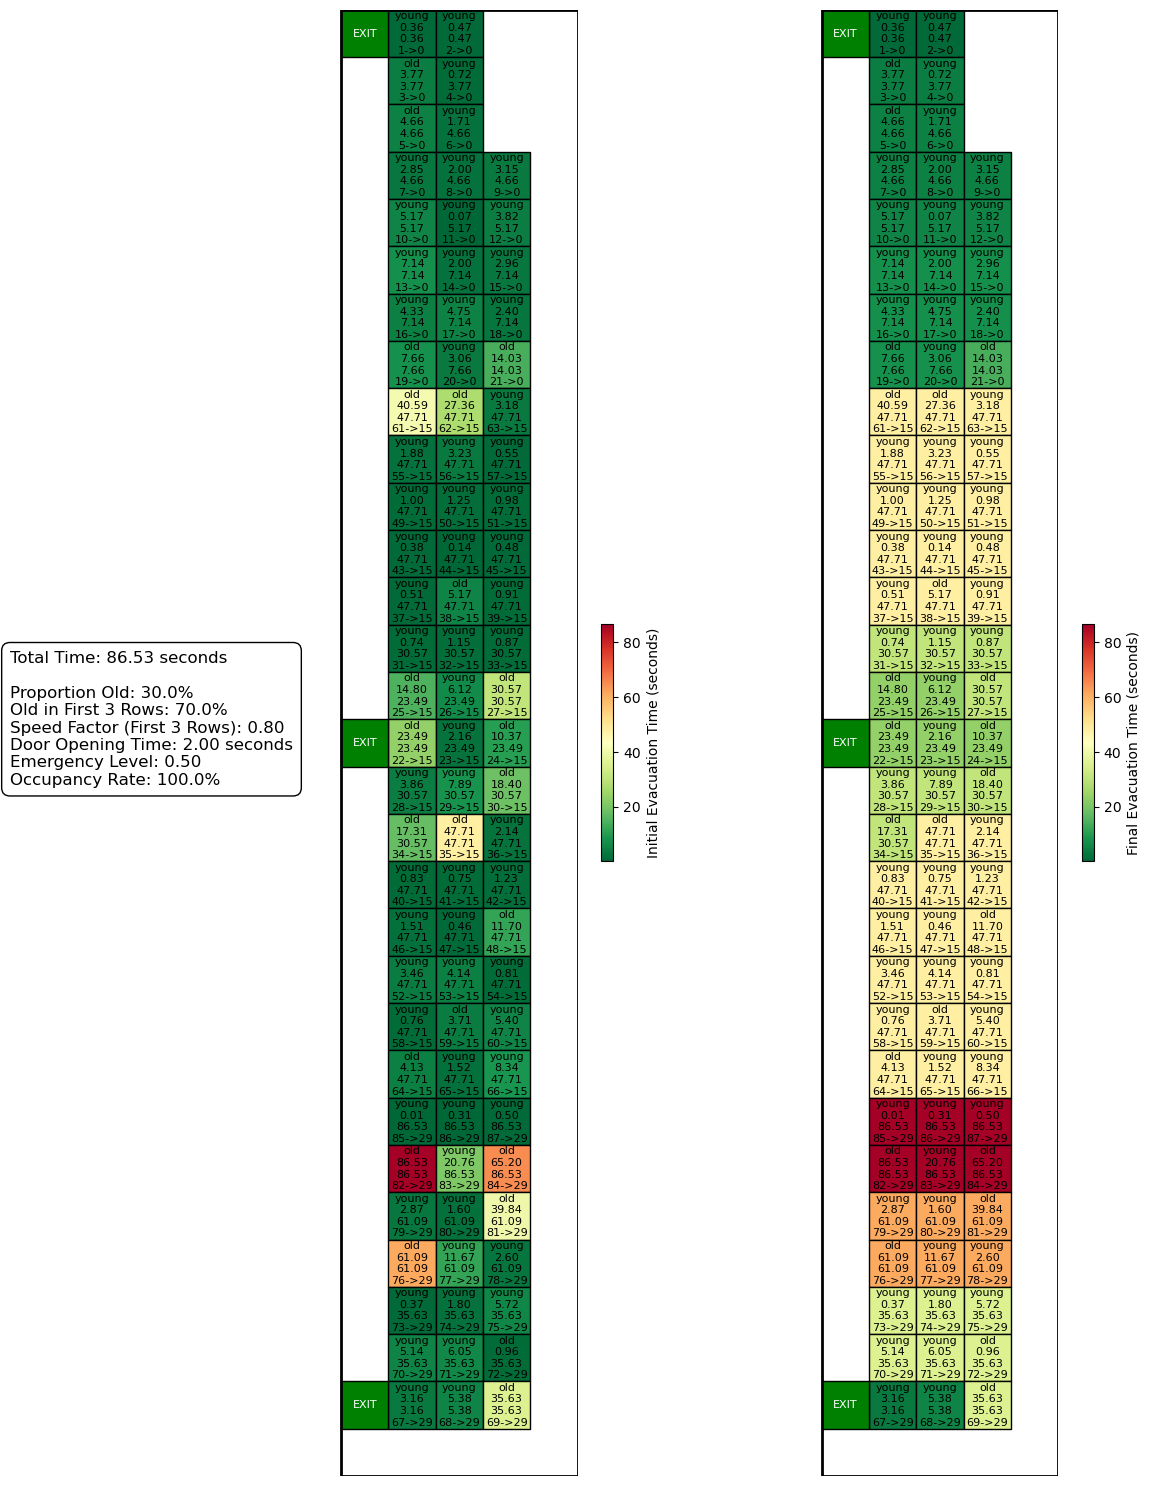

In [4]:
rows = 30           # Number of rows in the plane
seats_per_row = 3   # Seats per row (standard economy configuration)
exits = [0, 15, 29] # Locations of exits (front, middle, back exits)
speed_factor = 0.8  # First three rows move faster (80% of the normal time)
door_opening_time = 2  # Time for middle exit door to open (2 seconds)
num_simulations = 1000
proportion_old = 0.3  # 30% old passengers
old_in_first_3_rows_prob = 0.7  # 70% chance for old passengers to sit in the first 3 rows
emergency_level = 0.5  # Emergency level: 0.0 (low) to 1.0 (high)
occupancy_rate = 1  # 80% of seats are occupied

plane = Plane(rows, seats_per_row, exits, speed_factor, door_opening_time, proportion_old,
              old_in_first_3_rows_prob, emergency_level, occupancy_rate)
plane.simulate_evacuation()
plane.draw_seatmap('both')

## Hypothesis 1. Increased proportion of slow-moving passengers significantly extends evacuation time due to slower movement


Average evacuation time: 155.90 seconds
Standard deviation: 24.91 seconds


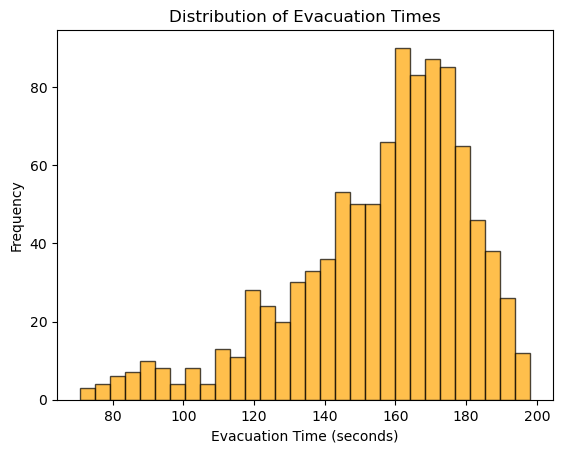

In [7]:
rows = 30           # Number of rows in the plane
seats_per_row = 6   # Seats per row (standard economy configuration)
exits = [0, 15, 29] # Locations of exits (front, middle, back exits)
speed_factor = 0.6  # First three rows move faster (80% of the normal time)
door_opening_time = 2  # Time for middle exit door to open (2 seconds)
num_simulations = 1000
proportion_old = 0.3  # 30% old passengers
old_in_first_3_rows_prob = 0.6  # 70% chance for old passengers to sit in the first 3 rows
emergency_level = 0.9  # Emergency level: 0.0 (low) to 1.0 (high)
occupancy_rate = 0.8  # 80% of seats are occupied

evacuation_times = monte_carlo_simulation(rows, seats_per_row, exits, speed_factor, door_opening_time, num_simulations,
                                          proportion_old, old_in_first_3_rows_prob, emergency_level, occupancy_rate)

# Analyze the results
average_time = np.mean(evacuation_times)
std_deviation = np.std(evacuation_times)

print(f"Average evacuation time: {average_time:.2f} seconds")
print(f"Standard deviation: {std_deviation:.2f} seconds")

# Plot the results
plt.hist(evacuation_times, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Evacuation Times')
plt.xlabel('Evacuation Time (seconds)')
plt.ylabel('Frequency')
plt.show()

Proportion of Slow-Moving Passengers 0% - Average Evacuation Time: 16.23 seconds, Standard Deviation: 1.84 seconds
Proportion of Slow-Moving Passengers 10.0% - Average Evacuation Time: 116.51 seconds, Standard Deviation: 40.99 seconds
Proportion of Slow-Moving Passengers 20.0% - Average Evacuation Time: 143.54 seconds, Standard Deviation: 32.68 seconds
Proportion of Slow-Moving Passengers 30.0% - Average Evacuation Time: 156.40 seconds, Standard Deviation: 25.06 seconds
Proportion of Slow-Moving Passengers 40.0% - Average Evacuation Time: 163.86 seconds, Standard Deviation: 20.26 seconds
Proportion of Slow-Moving Passengers 50.0% - Average Evacuation Time: 168.93 seconds, Standard Deviation: 16.87 seconds


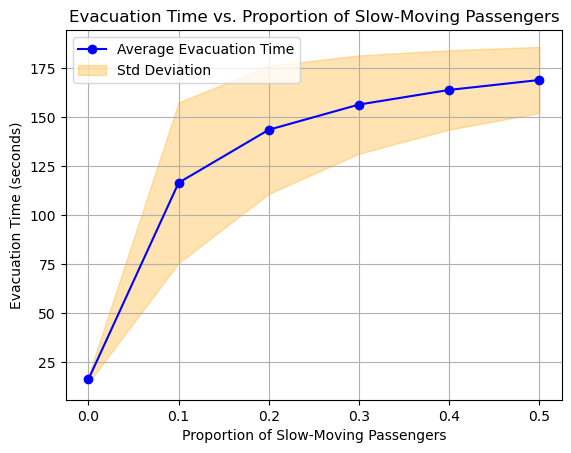

In [8]:
proportions_of_old = [0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Different proportions of old passengers
average_times = []  # To store the average evacuation times for each proportion
std_deviations = []  # To store the standard deviations for each proportion

# Loop through different old passenger proportions
for proportion_old in proportions_of_old:
    evacuation_times = monte_carlo_simulation(rows, seats_per_row, exits, speed_factor, door_opening_time, num_simulations,
                                              proportion_old, old_in_first_3_rows_prob, emergency_level, occupancy_rate)
    
    # Calculate the average evacuation time and standard deviation
    average_time = np.mean(evacuation_times)
    std_deviation = np.std(evacuation_times)
    
    average_times.append(average_time)
    std_deviations.append(std_deviation)
    
    print(f"Proportion of Slow-Moving Passengers {proportion_old*100}% - Average Evacuation Time: {average_time:.2f} seconds, Standard Deviation: {std_deviation:.2f} seconds")

# Visualize the evacuation times for different slow-moving passenger proportions
plt.plot(proportions_of_old, average_times, marker='o', linestyle='-', color='b', label='Average Evacuation Time')
plt.fill_between(proportions_of_old, np.array(average_times) - np.array(std_deviations),
                 np.array(average_times) + np.array(std_deviations), color='orange', alpha=0.3, label='Std Deviation')
plt.title('Evacuation Time vs. Proportion of Slow-Moving Passengers')
plt.xlabel('Proportion of Slow-Moving Passengers')
plt.ylabel('Evacuation Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Simulated data (replace with real results from monte_carlo_simulation)
proportions_of_old = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
evacuation_times_all = []  # Collect all simulation results for each proportion

for proportion_old in proportions_of_old:
    evacuation_times = monte_carlo_simulation(rows, seats_per_row, exits, speed_factor, door_opening_time, 
                                              num_simulations, proportion_old, old_in_first_3_rows_prob, 
                                              emergency_level, occupancy_rate)
    evacuation_times_all.append(evacuation_times)

# Perform One-way ANOVA
anova_result = f_oneway(*evacuation_times_all)

print(f"ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpret the p-value
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in evacuation times across proportions")
else:
    print("Fail to reject the null hypothesis: No significant difference in evacuation times across proportions")

ANOVA Test Result:
F-statistic: 4886.5295
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in evacuation times across proportions


In [10]:
# Generate an array of old passenger proportions
X = np.array(proportions_of_old)  # Old passenger proportions
X = sm.add_constant(X)  # Add constant term (intercept)
y = np.array(average_times)  # Average evacuation times

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Output the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     10.51
Date:                Tue, 10 Dec 2024   Prob (F-statistic):             0.0316
Time:                        19:16:41   Log-Likelihood:                -28.429
No. Observations:                   6   AIC:                             60.86
Df Residuals:                       4   BIC:                             60.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.9829     24.499      2.530      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
